## Matchings and Covers in Bipartite Graphs

Given a graph $G = (V,E)$, a *matching* $M$ in $G$ is a set of pairwise non-adjacent edges; that is, no two edges share a common vertex. A *maximum matching* is a matching that contains the largest possible number of edges.

A (*vertex*) *cover* $C$ in $G$ is a set of vertices such that for every edge $uv \in E$, either $u \in C$ or $v \in C$. A *minimum cover* is a cover of the smallest possible size.

### Algorithm for bipartite graphs

Maximum matching (and minumum cover) in bipartite graphs can be found in polynomial time using Max-Flow-Min-Cut algorithm (Ford Fulkerson).
Algorithm.
1. Let $G$ be a bipartite graph with vertex bipartition $V(G) = A \cup B$.
2. Create a directed weighted graph $G^+$ with vertex set $V(G) \cup \{s, t\}$, i.e., add two vertices, source ($s$) and sink ($t$).
3. Edges of $G^+$ are edges $(s, a)$, $a \in A$, $(b, t)$, $b \in B$ and edges of the original graph directed from $A$ to $B$.
4. Put weight (capacity) $1$ to edges of type $(s, a)$ and $(b, t)$ and $\infty$ (a large integer, e.g., the number of vertices in $G$) to all other edges (edges between $A$ and $B$).
5. Compute (integer) max flow $f$ with source $s$ and sink $t$.
6. Maximum matching consist of edges $\{uv \in E(G) \mid f(u, v) = 1\}$.
7. Compute min cut $(S, T)$, such that $s \in S$ and $t \in T$.  Minimum cover of $G$ is set $C = \{v \in A \mid v \in T\} \cup \{v \in B \mid v \in S\}$ 



Why does this work?

Let $f$ be the max flow (integral!) obtained in 5. Then the edge set in 6 is clearly a matching, since flow "coming" from the vertex $s$ to a vertex $a \in A$ has value 1 and, since it is integral, cannot "split" from $a$ towards two vertices in $B$ Also flow cannot "come" to a vertex $b \in B$ from two vertices in $A$, since it is integral and capacity of the edge $(b, t)$ is 1.

The reverse is also true, any matching $M$ produces a flow from $s$ to $t$ with value $|M|$. Therefore a max flow gives a max matching and a max matching gives a max flow.

What about min cut. The set $C$ from 7 is a cover, since every edge with endpoint in $A \cap T$ is covered and also every edge with endpoint in $B \cap S$ is covered. The only uncovered edges would be edges between $A \cap S$ and $B \cap T$, but that edges would be part of the cut, and since their capacity is infinity, min cut would have infinite value. This is clearly not possible since a trivial cut $S = \{s\}, T = A \cup B \cup \{t\}$ is clearly finite ($|A|$). The other way is also easy to see. For every cover of $G$ you can construct a cut of $G^+$ of the form in 7. See this [link](http://www.cs.toronto.edu/~siavosh/csc373h/files/TN6.pdf) for more detailed explanation.

### Exercise

Write functions `max_bipartite_matching(G)` and `min_bipartite_cover(G)` which return maximum matching and minimum cover in bipartite graph `G`. You can use Sage functions [flow](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html#sage.graphs.generic_graph.GenericGraph.flow) and [edge_cut](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html#sage.graphs.generic_graph.GenericGraph.edge_cut) to obtain max flow and min cut, respectively. 

In [87]:
def max_bipartite_matching(G):
    A, B = G.bipartite_sets()

    # construct a new graph
    G_p = DiGraph()
    source = G.order() + 1
    sink = G.order() + 2
    G_p.add_vertex(source)
    G_p.add_vertex(sink)
    for v in A:
        G_p.add_vertex(v)
    for v in B:
        G_p.add_vertex(v)
    for v in A:
        G_p.add_edge(source, v)
    for v in B:
        G_p.add_edge(v, sink) 
    for edge in G.edges():
        u, v = edge[0], edge[1]
        if u in A and v in B:
            G_p.add_edge(u, v)
        elif v in A and u in B:
            G_p.add_edge(v, u)
    
    capacity = {}
    for v in A:
        capacity[(source, v)] = 1
    for v in B:
        capacity[(v, sink)] = 1
    graph_size = G.order()
    for edge in G_p.edges():
        u, v = edge[0], edge[1]
        if u in A and v in B:
            capacity[(u, v)] = graph_size
    
    _, flow_dict = G_p.flow(source, sink, value_only=False)
    flow_edges_A_to_B = []
    for edge in flow_dict.edges():
        u, v, flow = edge
        if u in A and v in B and flow > 0:
            flow_edges_A_to_B.append((u, v, flow))
    
    return flow_edges_A_to_B

    # connect all the vertices in A to source
    # connect all the vertices in B to sink
    # add edges that are in original graph G to G_p -> their direction is from A to B
    # add weights of capacity 1 to all edges from source to A, from B to sink
    # add weights of capacity (size of G) to all edges from A to B
    # compute the flow from source to sink in G_p - use built-in flow function (use flow with value only = false)
    # now we get a flow graph where we find the edges that are from A to B and are in the flow graph
    # ...
    

In [88]:
G = graphs.RandomBipartite(6, 7, 0.3)

In [89]:
G = Graph({1: [5, 6, 8], 2: [5, 7], 3: [7], 4: [7]})
G.set_pos({1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 4), 5: (1, 1), 6: (1, 2), 7: (1, 3), 8: (1, 4)})

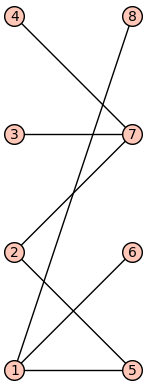

In [90]:
G.plot()

In [91]:
G.bipartite_sets()

({1, 2, 3, 4}, {5, 6, 7, 8})

In [92]:
M = max_bipartite_matching(G)

In [93]:
M

[(1, 6, 1), (2, 5, 1), (3, 7, 1)]

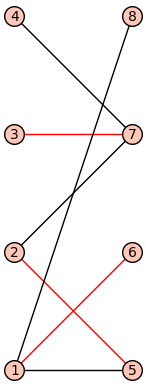

In [94]:
G.show(edge_colors={"red": M})

In [109]:
def min_bipartite_cover(G):
    A, B = G.bipartite_sets()
    # construct a new graph
    G_p = DiGraph()
    source = G.order() + 1
    sink = G.order() + 2
    G_p.add_vertex(source)
    G_p.add_vertex(sink)
    for v in G:
        G_p.add_vertex(v)
    for v in A:
        G_p.add_edge(source, v, 1)
    for v in B:
        G_p.add_edge(v, sink, 1) 
    for edge in G.edges():
        u, v = edge[0], edge[1]
        if u in A and v in B:
            G_p.add_edge(u, v, G.order())
        elif v in A and u in B:
            G_p.add_edge(v, u, G.order())
    
    _, _, sets =  G_p.edge_cut(source, sink, vertices=True)
    return [v for v in A if v in sets[1]] + [v for v in B if v in sets[0]]

In [111]:
cover = min_bipartite_cover(G)

In [112]:
cover

[1, 2, 7]

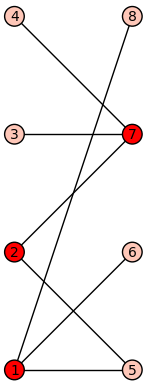

In [113]:
G.show(vertex_colors={"red": cover})

In [114]:
def set_bipartite_pos(G):
    A, B = G.bipartite_sets()
    pos = {}
    for i, a in enumerate(A): 
        pos[a] = (0, i)
    for i, b in enumerate(B):
        pos[b] = (1, i)
    G.set_pos(pos)

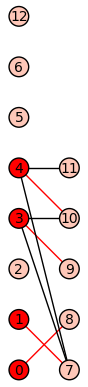

In [117]:
G = graphs.RandomBipartite(6, 7, 0.3)
G.relabel()
set_bipartite_pos(G)

M = max_bipartite_matching(G)
cover = min_bipartite_cover(G)
G.show(edge_colors={"red": M}, vertex_colors={"red": cover})